## Simulated SDR receiver system

<i>The purpose of an SDR receiver frontend is ultimately to convert a high-frequency RF signal into baseband (low-frequency) data that can be digitally processed (DSP). Here we walk through the steps of such a system with <b>RF, IF and DDC stages</b>.</i>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 6]

In [2]:
n_buckets = 8000
t = np.arange(n_buckets)

### Stage 1: RF
#### First we synthesize an AM signal to represent our RF input
(Signal = payload * carrier)

#### Payload

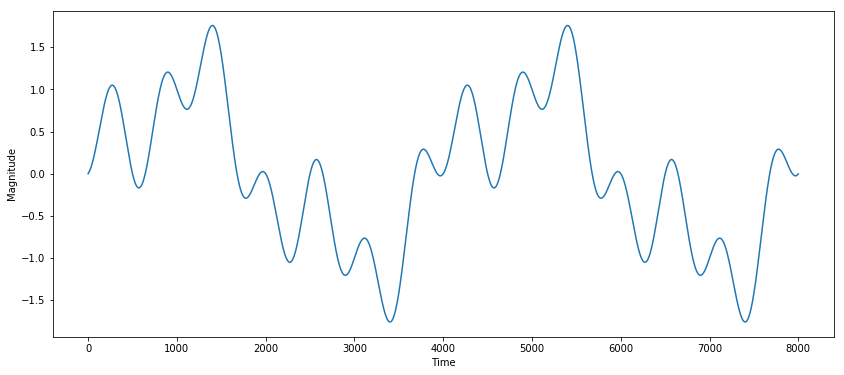

In [9]:
c1 = np.sin(2*2*np.pi*t / n_buckets)
c2 = np.sin(4*2*np.pi*t / n_buckets)
c3 = np.sin(10*2*np.pi*t / n_buckets)
payload = c1 + c2 * c3
plt.plot(t, payload)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show()

#### Carrier

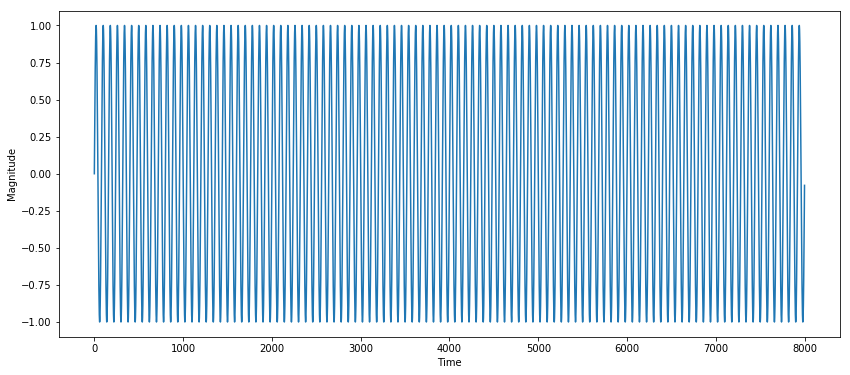

In [4]:
f_carry = 100
carrier = np.sin(f_carry*2*np.pi*t / n_buckets)

plt.gcf().clear()
plt.plot(t, carrier)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show()

#### RF Signal

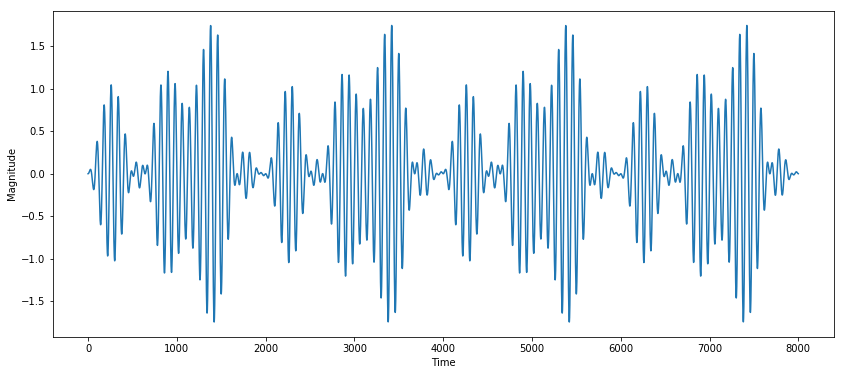

In [5]:
rf_sig = payload * carrier

plt.gcf().clear()
plt.plot(t, rf_sig)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show()

### Stage 2: IF
#### Given an RF input, we use heterodyning to bring the signal to a lower "intermediate frequency" (IF)

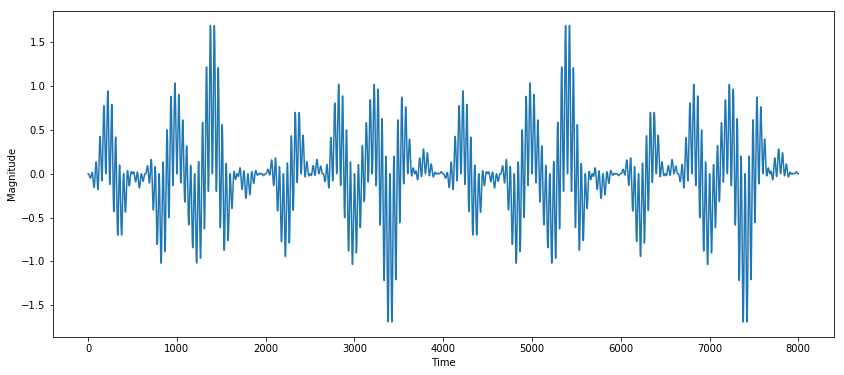

In [27]:
f_lo = 80  # Local oscillator frequency; IF centered at f_carry - f_lo, in this case 20 Hz.
lo_sig = np.sin(f_lo*2*np.pi*t / n_buckets)
if_sig = -rf_sig * lo_sig

## TODO: LPF for superheterodyne (remove f_lo + f_carry sideband)

plt.gcf().clear()
plt.plot(t, if_sig)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show()

### Stage 3: DDC
#### Perform analog-to-digital conversion, then translate the IF signal into complex baseband components I and Q

#### TODO: A/D conversion

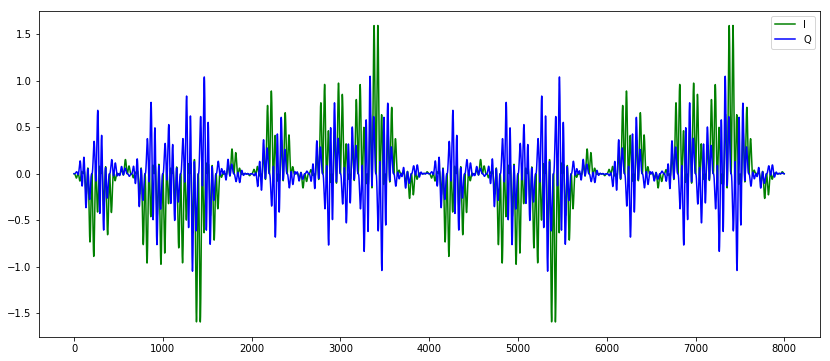

In [37]:
f_do = 20  # digital oscillator
sig_I = if_sig * np.cos(f_do*2*np.pi*t/n_buckets)
sig_Q = if_sig * -np.sin(f_do*2*np.pi*t/n_buckets)

plt.gcf().clear()
plt.plot(t, sig_I, 'g')
plt.plot(t, sig_Q, 'b')
plt.legend(['I', 'Q'])
plt.show()

#### <i>Have "baseband" I and Q data from RF signal!</i>
TODO - For baseband, implement LPF in stage 2 <br />
TODO - Add signal spectra (FFT) throughout for better process visualization